# Overview

# Import Packages

In [104]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Data Understanding

### Path and File Names

In [92]:
# normal/pneumonia dataset path
train_normal_dir = 'data/train/NORMAL'
train_pneumonia_dir = 'data/train/PNEUMONIA'

# normal file name list
train_normal_names = os.listdir(train_normal_dir)
print('5 noraml file names:')
print(train_normal_names[:5], '\n')

# pneumonia file name list
train_pneumonia_names = os.listdir(train_pneumonia_dir)
print('5 pneumonia file names:')
print(train_pneumonia_names[:5], '\n')

# normal/pneumonia total image counts
print('total training normal images:', len(train_normal_names))
print('total training pneumonia images:', len(train_pneumonia_names))

5 noraml file names:
['NORMAL2-IM-0927-0001.jpeg', 'NORMAL2-IM-1056-0001.jpeg', 'IM-0427-0001.jpeg', 'NORMAL2-IM-1260-0001.jpeg', 'IM-0656-0001-0001.jpeg'] 

5 pneumonia file names:
['person63_bacteria_306.jpeg', 'person1438_bacteria_3721.jpeg', 'person755_bacteria_2659.jpeg', 'person478_virus_975.jpeg', 'person661_bacteria_2553.jpeg'] 

total training normal images: 1342
total training pneumonia images: 3876


### Images

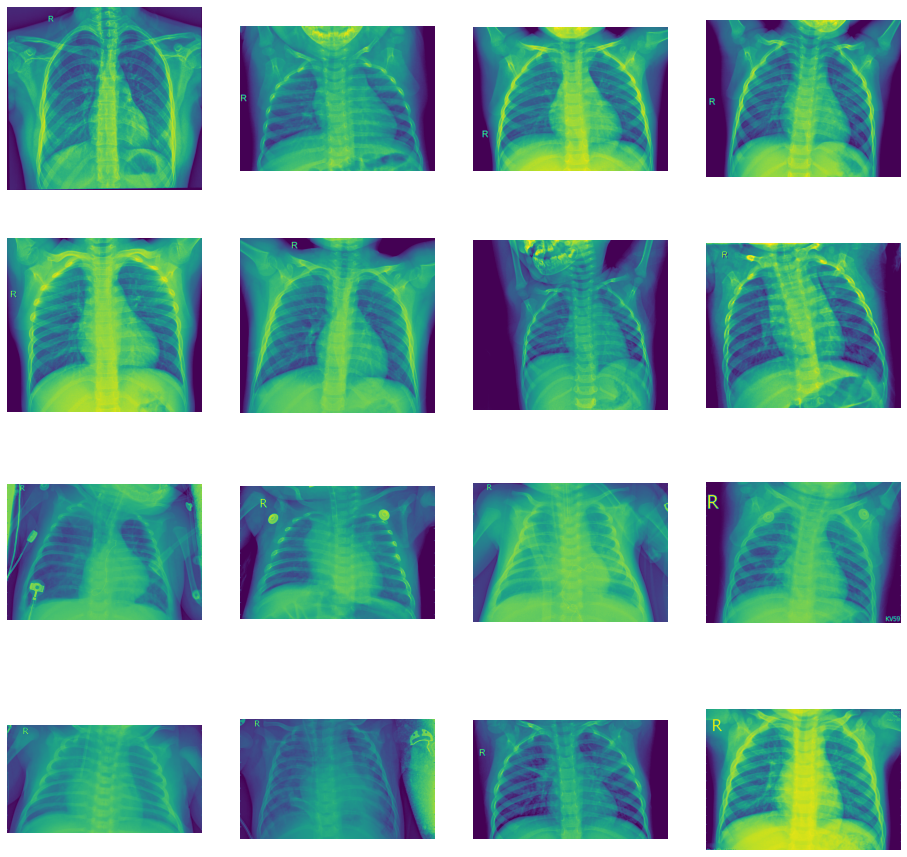

In [93]:
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) for fname in train_pneumonia_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

# Data Analysis

### Normal X-ray

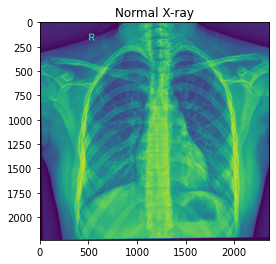

In [94]:
normal = mpimg.imread(next_normal_pix[0])
plt.title('Normal X-ray')
plt.imshow(normal);

### Pneumonia X-ray

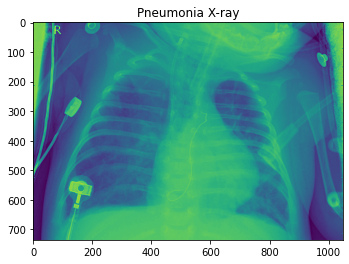

In [95]:
pneumonia = mpimg.imread(next_pneumonia_pix[0])
plt.title('Pneumonia X-ray')
plt.imshow(pneumonia);

### Image Size

In [96]:
print('Normal image size:', normal.shape)
print('Pneumonia image size:', pneumonia.shape)

Normal image size: (2234, 2359)
Pneumonia image size: (736, 1048)


# Modeling - Baseline

### Create Model

In [97]:
baseline = Sequential([
    # Flatten
    Flatten(input_shape=(150, 150, 3)),
    # 512 Neuron (Hidden layer)
    Dense(512, activation='relu'),
    # 100,Neuron (Hidden layer)
    Dense(100, activation='relu'),
    # 1 Output neuron
    Dense(1, activation='sigmoid')
])

baseline.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 67500)             0         
                                                                 
 dense_20 (Dense)            (None, 512)               34560512  
                                                                 
 dense_21 (Dense)            (None, 100)               51300     
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 34,611,913
Trainable params: 34,611,913
Non-trainable params: 0
_________________________________________________________________


In [98]:
baseline.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.001),
                 metrics=['accuracy'])

### Image Preprocessing

In [99]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('data/train',
                                                    target_size=(150, 150),
                                                    batch_size=64,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory('data/test',
                                                  target_size=(150, 150),
                                                  batch_size=64,
                                                  class_mode='binary')
val_generator = val_datagen.flow_from_directory('data/val',
                                                target_size=(150, 150),
                                                batch_size=64,
                                                class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [134]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

### Model Training

In [101]:
es = EarlyStopping(patience=20)
mc = ModelCheckpoint('baseline.h5', save_best_only=True, monitor='val_loss')


In [102]:
history = baseline.fit(train_generator,
                       steps_per_epoch=8,
                       epochs=150,
                       verbose=1,
                       validation_data=val_generator,
                       callbacks=[es, mc])

Epoch 1/150


2022-05-11 15:24:44.883040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 24.7821 - accuracy: 0.6387

2022-05-11 15:24:48.553594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 5s 434ms/step - loss: 24.7821 - accuracy: 0.6387 - val_loss: 53.9170 - val_accuracy: 0.5000
Epoch 2/150
8/8 [==============================] - 4s 451ms/step - loss: 13.8265 - accuracy: 0.6074 - val_loss: 14.3662 - val_accuracy: 0.5000
Epoch 3/150
8/8 [==============================] - 3s 394ms/step - loss: 4.1947 - accuracy: 0.6855 - val_loss: 7.3303 - val_accuracy: 0.5000
Epoch 4/150
8/8 [==============================] - 3s 383ms/step - loss: 1.8334 - accuracy: 0.7324 - val_loss: 1.3652 - val_accuracy: 0.7500
Epoch 5/150
8/8 [==============================] - 3s 368ms/step - loss: 1.2085 - accuracy: 0.7793 - val_loss: 2.2882 - val_accuracy: 0.6875
Epoch 6/150
8/8 [==============================] - 3s 368ms/step - loss: 1.6773 - accuracy: 0.7402 - val_loss: 2.0036 - val_accuracy: 0.6250
Epoch 7/150
8/8 [==============================] - 3s 392ms/step - loss: 1.2286 - accuracy: 0.7949 - val_loss: 2.8888 - val_accuracy: 0.6250
Epoch 8/150
8/8 [====

Epoch 59/150
8/8 [==============================] - 3s 349ms/step - loss: 0.1923 - accuracy: 0.9434 - val_loss: 0.9758 - val_accuracy: 0.7500
Epoch 60/150
8/8 [==============================] - 3s 334ms/step - loss: 0.2943 - accuracy: 0.9141 - val_loss: 0.2285 - val_accuracy: 0.8750
Epoch 61/150
8/8 [==============================] - 3s 377ms/step - loss: 0.4129 - accuracy: 0.8887 - val_loss: 2.8771 - val_accuracy: 0.5625
Epoch 62/150
8/8 [==============================] - 3s 391ms/step - loss: 0.1797 - accuracy: 0.9473 - val_loss: 0.7471 - val_accuracy: 0.7500


In [103]:
baseline.load_weights('baseline.h5')
baseline.evaluate(test_generator)

10/10 [==============================] - 3s 285ms/step - loss: 0.7218 - accuracy: 0.8173


[0.7218284606933594, 0.817307710647583]

# Modeling - Tuning

### Create Tuned Model

In [139]:
model = Sequential([
    # The first convolution
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPool2D(2, 2),
    # The second convolution
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
     # The Third convolution
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
     # The fourth convolution
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
     # The fifth convolution
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    # Flatten
    Flatten(),
    # 512 Neuron (Hidden layer)
    Dense(512, activation='relu', kernel_regularizer=regularizers.L2(0.05)),
    Dropout(0.25),
    # 100 Neuron (Hidden layer)
    Dense(128, activation='relu', kernel_regularizer=regularizers.L2(0.05)),
    Dropout(0.25),
    # 32 Neuron (Hidden layer)
    Dense(32, activation='relu', kernel_regularizer=regularizers.L2(0.05)),
    Dropout(0.25),
    # 1 Output neuron
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 17, 17, 64)     

In [140]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

### Train Tuned Model

In [129]:
es = EarlyStopping(patience=40)
mc = ModelCheckpoint('tuned.h5', save_best_only=True, monitor='val_loss')

In [130]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=150,
                    verbose=1,
                    validation_data=val_generator,
                    callbacks=[es, mc])

Epoch 1/150
8/8 [==============================] - 4s 343ms/step - loss: 0.2293 - accuracy: 0.9199 - val_loss: 0.4491 - val_accuracy: 0.8125
Epoch 2/150
8/8 [==============================] - 3s 374ms/step - loss: 0.2151 - accuracy: 0.9258 - val_loss: 0.5760 - val_accuracy: 0.8125
Epoch 3/150
8/8 [==============================] - 3s 360ms/step - loss: 0.2062 - accuracy: 0.9375 - val_loss: 0.5430 - val_accuracy: 0.8125
Epoch 4/150
8/8 [==============================] - 3s 351ms/step - loss: 0.1669 - accuracy: 0.9609 - val_loss: 0.2396 - val_accuracy: 0.9375
Epoch 5/150
8/8 [==============================] - 3s 353ms/step - loss: 0.1620 - accuracy: 0.9531 - val_loss: 0.4257 - val_accuracy: 0.8750
Epoch 6/150
8/8 [==============================] - 3s 370ms/step - loss: 0.1917 - accuracy: 0.9512 - val_loss: 0.3883 - val_accuracy: 0.9375
Epoch 7/150
8/8 [==============================] - 3s 322ms/step - loss: 0.1628 - accuracy: 0.9629 - val_loss: 0.9385 - val_accuracy: 0.8125
Epoch 8/150
8

Epoch 59/150
8/8 [==============================] - 3s 353ms/step - loss: 0.1110 - accuracy: 0.9707 - val_loss: 0.1463 - val_accuracy: 0.9375
Epoch 60/150
8/8 [==============================] - 3s 336ms/step - loss: 0.1202 - accuracy: 0.9707 - val_loss: 0.1679 - val_accuracy: 0.9375
Epoch 61/150
8/8 [==============================] - 3s 360ms/step - loss: 0.1308 - accuracy: 0.9609 - val_loss: 0.6237 - val_accuracy: 0.8125
Epoch 62/150
8/8 [==============================] - 3s 329ms/step - loss: 0.0942 - accuracy: 0.9833 - val_loss: 0.9153 - val_accuracy: 0.8125
Epoch 63/150
8/8 [==============================] - 3s 385ms/step - loss: 0.1100 - accuracy: 0.9805 - val_loss: 0.8885 - val_accuracy: 0.8125
Epoch 64/150
8/8 [==============================] - 4s 503ms/step - loss: 0.0875 - accuracy: 0.9863 - val_loss: 0.5197 - val_accuracy: 0.8125
Epoch 65/150
8/8 [==============================] - 3s 365ms/step - loss: 0.1066 - accuracy: 0.9746 - val_loss: 0.5229 - val_accuracy: 0.8125
Epoch 

8/8 [==============================] - 3s 318ms/step - loss: 0.1508 - accuracy: 0.9604 - val_loss: 0.8263 - val_accuracy: 0.8125
Epoch 117/150
8/8 [==============================] - 3s 349ms/step - loss: 0.1446 - accuracy: 0.9590 - val_loss: 0.9791 - val_accuracy: 0.7500
Epoch 118/150
8/8 [==============================] - 3s 345ms/step - loss: 0.1504 - accuracy: 0.9590 - val_loss: 0.3325 - val_accuracy: 0.8750
Epoch 119/150
8/8 [==============================] - 3s 376ms/step - loss: 0.1257 - accuracy: 0.9668 - val_loss: 0.2496 - val_accuracy: 0.8750
Epoch 120/150
8/8 [==============================] - 3s 342ms/step - loss: 0.1274 - accuracy: 0.9688 - val_loss: 0.6652 - val_accuracy: 0.8125
Epoch 121/150
8/8 [==============================] - 3s 364ms/step - loss: 0.0952 - accuracy: 0.9805 - val_loss: 0.1707 - val_accuracy: 0.9375
Epoch 122/150
8/8 [==============================] - 3s 367ms/step - loss: 0.1252 - accuracy: 0.9648 - val_loss: 0.1509 - val_accuracy: 0.9375
Epoch 123/150

In [141]:
model.load_weights('tuned.h5')
model.evaluate(test_generator)

2022-05-11 19:16:47.820839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 4s 286ms/step - loss: 0.3902 - accuracy: 0.8798


[0.3902100920677185, 0.879807710647583]